**Replicate figures in the following paper:** </br>
*Cohen, N.M., Schwartzman, O., Jaschek, R. et al. Personalized lab test models to quantify disease potentials in healthy individuals. Nat Med 27, 1582–1591 (2021). https://doi.org/10.1038/s41591-021-01468-6*

In [1]:
from fig_replication import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load processed data
lab_result_cm_paired = pickle.load(open('/data/datasets/changyuyin/1_Personalized_Lab_Test/lab_result_cm_processed.pkl','rb'))

# Demo Implementation

## set lab loinc of interest

In [6]:
#demo: Cholesterol [Mass/volume] in Serum or Plasma
loinc_fig = '2093-3'

## Subsetting the whole dataset into lab to be used 

##############################################################
Summary of the sub dataset with LOINC code:  2093-3
[1]df dims before preprocess: (75983706, 45)
[2]df dims after preprocess: (154531, 45)
[3]min age at lab order: 20.0
[4]max age at lab order: 114.0
[5]quantiles at lab order:
Quantiles:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Values:  [20.0, 50.0, 56.0, 59.0, 63.0, 66.0, 69.0, 72.0, 76.0, 81.0]
##############################################################


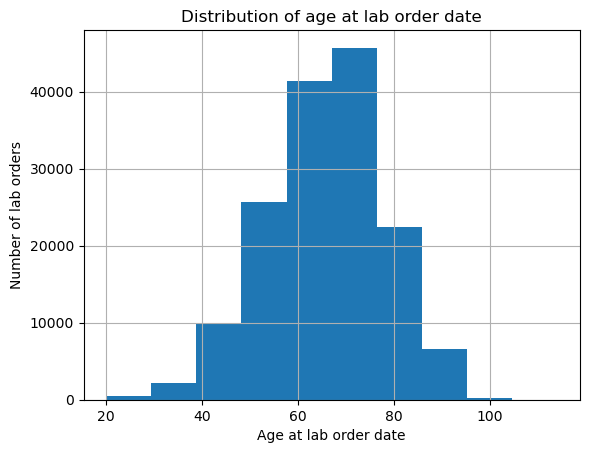

In [7]:
lab_result_fig = lab_figure_subset(df_lab_all=lab_result_cm_paired,\
                                  loinc_to_extract=loinc_fig,\
                                  age_floor=20)

In [8]:
lab_result_fig.head(3)

,LAB_RESULT_CM_ID,ID,ENCOUNTERID,SPECIMEN_SOURCE,LAB_LOINC,LAB_RESULT_SOURCE,LAB_LOINC_SOURCE,PRIORITY,RESULT_LOC,LAB_PX,...,study_range_max,study_range_max_1,study_range_max_05,DEATH_DATE,IF_any3cancer,lab_age,age_band,BreastCancer,ColorectalCancer,LungCancer
361,cfhOcbEKSVWuqQI=,03Nov2022IRB20200313700079806,cfhOcroASlOorw0=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2011-10-10,2012-10-10,2013-04-10,NaN,1,55.0,"[50,60)",0,0,1
406,cfhOcbEKT1+rrQy6,03Nov2022IRB20200313700175141,cfhOdr8ES1GtrgE=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2018-04-06,2019-04-06,2019-10-06,NaN,1,52.0,"[50,60)",0,0,1
514,cfhOcbgATVCqrQC4,03Nov2022IRB20200313700010135,cfhOcLwHSl6vqwE=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2016-06-14,2017-06-14,2017-12-14,NaN,1,55.0,"[50,60)",1,0,1


# Fig 2b

##############################################################
Cohort Distribution:  Total lab orders  154531
Subcohorts:
BreastCancer                                78101
/LungCancer                                 34572
/ColorectalCancer                           33800
BreastCancer/LungCancer                      3353
BreastCancer/ColorectalCancer                2222
/LungCancer/ColorectalCancer                 2176
BreastCancer/LungCancer/ColorectalCancer      307
Name: Cohort, dtype: int64
##############################################################


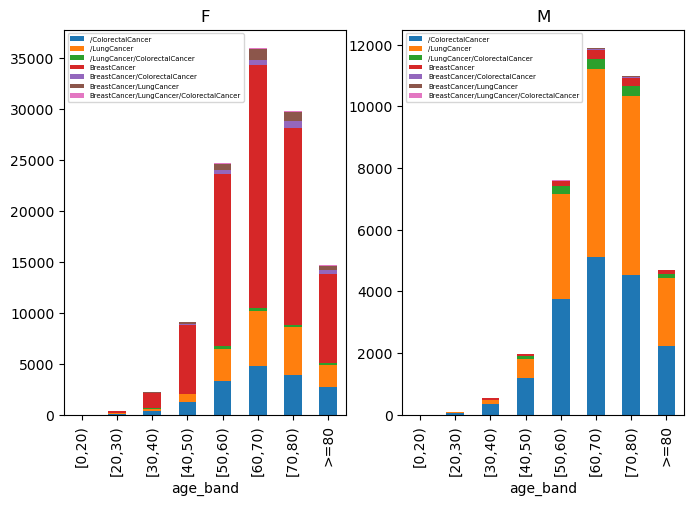

In [9]:
#add a label column, and plot
lab_result_fig= replica_fig_2b(lab_fig=lab_result_fig,\
                  category_columns=["BreastCancer","LungCancer","ColorectalCancer"])

# Fig 2c

##############################################################
Outlier removed for smoothing: 
only values within ( 0.0025 , 0.9975 ) quantiles are kept.
##############################################################


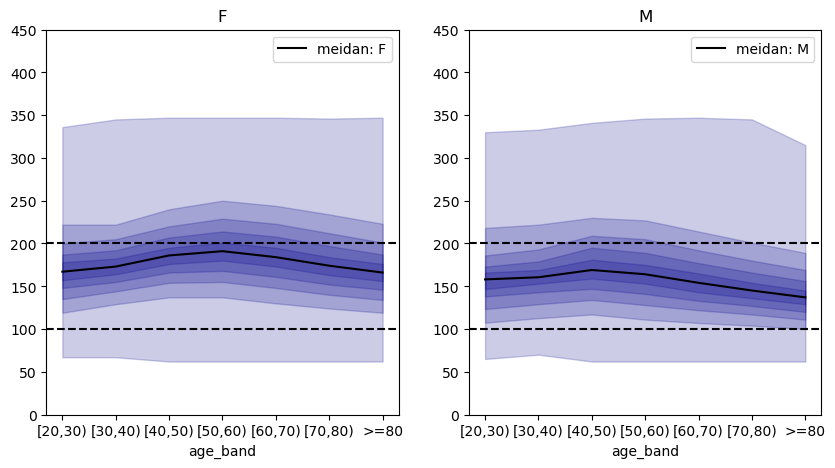

In [20]:
lab_result_fig_trimmed = replica_fig_2c(lab_result_fig,\
                                           outlier_floor=0.0025,\
                                           outlier_ceiling=0.9975,\
                                           norm_low=100,\
                                           norm_high=200)

In [11]:
lab_result_fig_trimmed.head()

,LAB_RESULT_CM_ID,ID,ENCOUNTERID,SPECIMEN_SOURCE,LAB_LOINC,LAB_RESULT_SOURCE,LAB_LOINC_SOURCE,PRIORITY,RESULT_LOC,LAB_PX,...,study_range_max_1,study_range_max_05,DEATH_DATE,IF_any3cancer,lab_age,age_band,BreastCancer,ColorectalCancer,LungCancer,Cohort
361,cfhOcbEKSVWuqQI=,03Nov2022IRB20200313700079806,cfhOcroASlOorw0=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2012-10-10,2013-04-10,NaN,1,55.0,"[50,60)",0,0,1,/LungCancer
406,cfhOcbEKT1+rrQy6,03Nov2022IRB20200313700175141,cfhOdr8ES1GtrgE=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2019-04-06,2019-10-06,NaN,1,52.0,"[50,60)",0,0,1,/LungCancer
514,cfhOcbgATVCqrQC4,03Nov2022IRB20200313700010135,cfhOcLwHSl6vqwE=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2017-06-14,2017-12-14,NaN,1,55.0,"[50,60)",1,0,1,BreastCancer/LungCancer
602,cfhOcb0AQ1+rqgWx,03Nov2022IRB20200313700243942,cfhOd7EKSVWoqgM=,SER_PLAS,2093-3,OD,DW,R,L,LAB18,...,2013-10-29,2014-04-29,NaN,1,74.0,"[70,80)",0,1,1,/LungCancer/ColorectalCancer
741,cfhOcbEKSVSuog24,03Nov2022IRB20200313700116934,cfhOdrwFQ1KorQY=,SER_PLAS,2093-3,OD,DW,R,L,LAB156106,...,2011-11-13,2012-05-13,NaN,1,65.0,"[60,70)",1,0,0,BreastCancer


# Fig 3a

-----------------calculating normalized lab values, please wait:
Done in --- 138.42873740196228 seconds ---
-----------------processing dataset, please wait:
Done in --- 0.4419426918029785 seconds ---
-----------------computing, please wait:
Done in --- 8.174043655395508 seconds ---
-----------------fitting cox harzard model, please wait:


100%|██████████| 10/10 [00:00<00:00, 11.96it/s]


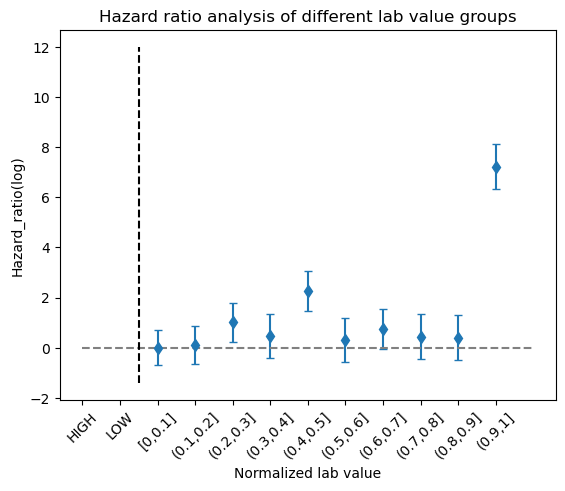

In [18]:
#The abnormal-high/low groups will make the figure unreadable (high std&value). 
#Maybe furtehr preprocessing is necessary.
#I have made an option to hide them
lab_result_fig_trimmed = replica_fig_3a(lab_result_fig_trimmed,
                                          follow_up_yrs = 8,\
                                          hide_abnormal_group=True)

-----------------calculating normalized lab values, please wait:
Done in --- 18.729933977127075 seconds ---
-----------------processing dataset, please wait:
Done in --- 0.5864710807800293 seconds ---
-----------------computing, please wait:
Done in --- 8.020605564117432 seconds ---
-----------------fitting cox harzard model, please wait:


100%|██████████| 10/10 [00:00<00:00, 12.15it/s]


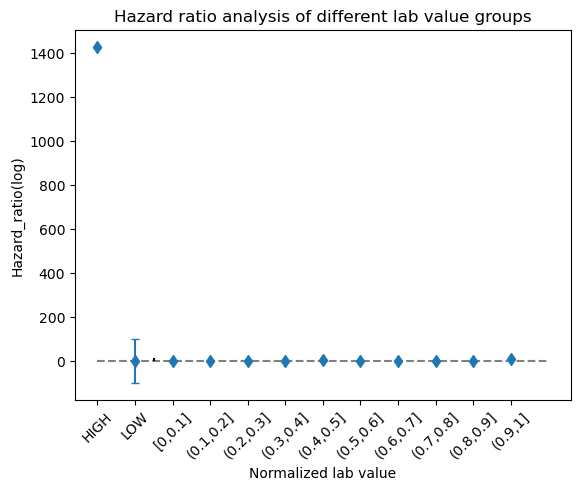

In [21]:
#unhide them now
lab_result_fig_trimmed = replica_fig_3a(lab_result_fig_trimmed,
                                          follow_up_yrs = 8,\
                                          hide_abnormal_group=False)

# Fig 3b

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE and PCA, but also for general non-linear dimension reduction. </br>
Reference material:
https://www.kaggle.com/code/bextuychiev/beautiful-umap-tutorial-on-100-dimensional-data

These four parameters affect UMAP most, so I've implemented in the function.
- `n_components` controls the number of dimensions after the projection. The default is 2 for its ease of visualization.
- `n_neighbors` controls the area of the local neighborhood UMAP looks at for each sample when building the manifold
- `min_dist` which controls the literal distance between data points.
- `metric` represents the formula to calculate the distance between points.

In [25]:
umap_covariates = ['SEX',\
                   'HISPANIC',\
                   'RACE',\
                   'ZIP_CODE',\
                   'lab_age',\
                   'Cohort']

-----------------imputing missing values, please wait:
Done in --- 0.28291773796081543 seconds ---
-----------------encoding covariates, please wait:
Done in --- 0.6921343803405762 seconds ---
-----------------UMAP transforming/reducing covarites, please wait:
Done in --- 125.60010123252869 seconds ---


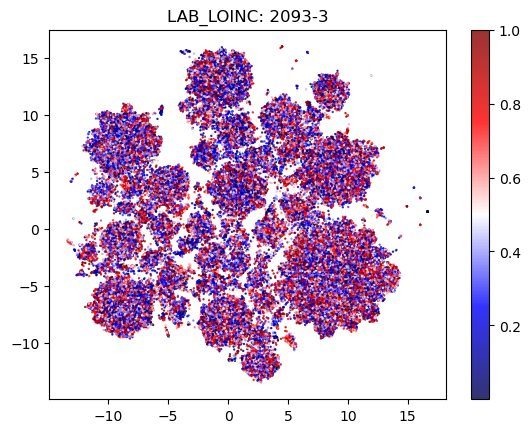

In [108]:
#See link above for how hyperparameters affect the dimension reducntion process and plotting 
replica_fig_3b(lab_fig=lab_result_fig_trimmed,\
                   umap_covariates=umap_covariates,\
                   umap_n_components=2,\
                   umap_n_neighbors=5,\
                   umap_min_dist=0.7,\
                   umap_metric='euclidean')

-----------------imputing missing values, please wait:
Done in --- 0.27934837341308594 seconds ---
-----------------encoding covariates, please wait:
Done in --- 0.6443800926208496 seconds ---
-----------------UMAP transforming/reducing covarites, please wait:
Done in --- 243.52662682533264 seconds ---


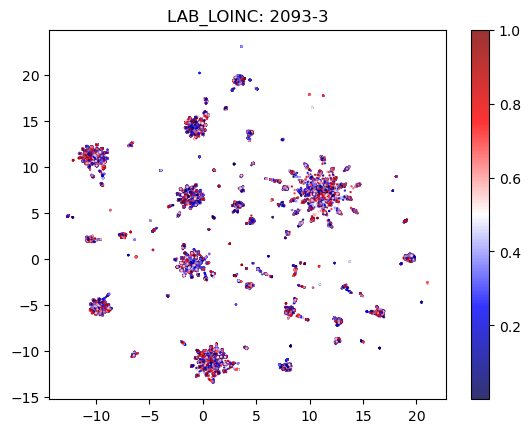

In [107]:
#You can also use default params
replica_fig_3b(lab_fig=lab_result_fig_trimmed,
                   umap_covariates=umap_covariates)